# STEP 2

Import Libraries

In [117]:
import os
import numpy as np
import pandas as pd
import pandapower.control as control
import pandapower.networks as nw
import pandapower.timeseries as timeseries
from pandapower.timeseries.data_sources.frame_data import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl
import pandapower.plotting as plot
import matplotlib.pyplot as plt

## Functions

### Plot with ColorMaps

In [140]:
def plot_colormaps(line_values,bus_values,trafo_values,load_values,file_name):
    
    cmap_list_line=[(0, "#00e33e"),(max_line_loading/2, "yellow"),  (max_line_loading, "red")]
    cmap_list_bus=[((0,bus_min_pu), "purple"),((bus_min_pu,bus_max_pu),"blue"), ((bus_max_pu,1.5), "red")]
    cmap_list_trafo=[((0, 80), "#00e33e"), ((80, max_trafo_loading-1), "yellow"), ((max_trafo_loading-1,max_trafo_loading), "red")]
    cmap_list_load=[((0,0.001), "red"), ((0.001,15),"#00e33e")]

    cmap_line, norm_line = plot.cmap_continuous(cmap_list_line)
    cmap_bus, norm_bus= plot.cmap_discrete(cmap_list_bus)
    cmap_trafo, norm_trafo =plot.cmap_discrete(cmap_list_trafo)
    cmap_load, norm_load = plot.cmap_discrete(cmap_list_load)

    load_colors=cmap_load(norm_load(load_values))

    line_c = plot.create_line_collection(net, net.line.index, z=line_values, zorder=1, cmap=cmap_line, norm=norm_line, linewidths=2)
    bus_c = plot.create_bus_collection(net, net.bus.index, z=bus_values, size=0.2, zorder=2, cmap=cmap_bus, norm=norm_bus)
    trafo_c= plot.create_trafo_collection(net, net.trafo.index, z=trafo_values, zorder=3, cmap=cmap_trafo, norm=norm_trafo)
    load_c = plot.create_load_collection(net, net.load.index, size=0.3, color=load_colors)
    
    plot.draw_collections([line_c, bus_c, trafo_c ,load_c], figsize=(15,8))

    # Custom switch plotting
    for i, switch in net.switch.iterrows():
        bus_idx = switch['bus']
        element_idx = switch['element']
        # Get coordinates (assuming the switch connects a bus to a line or another bus)
        bus_coords = net.bus_geodata.loc[bus_idx]
        if bus_idx==14 or bus_idx==7 or bus_idx==4:
            if switch['closed']==1:
                plt.plot(bus_coords.x, bus_coords.y, 'bx', markersize=15)
            else:
                plt.plot(bus_coords.x, bus_coords.y, 'rx',markersize=15)
                
    plt.savefig(file_name)

### Create Data Source

In [119]:
def create_data_source(loadshape,variable):

    profiles = pd.DataFrame()

    for i,load in net.load.iterrows():
        profiles[f'L_{i}'] = loadshape * load[variable]

    #print(f'{variable}\n{profiles}')

    ds = DFData(profiles)
    
    return profiles, ds

### Create Controllers

In [120]:
def create_controllers(net, ds,variable):

    for i,load in net.load.iterrows():
        ConstControl(net, element='load', variable=variable, element_index=i,data_source=ds, profile_name=[f'L_{i}'])


### Create Output Writer

In [121]:
def create_output_writer(net, time_steps,output_dir):
    ow = OutputWriter(net, time_steps, output_path=output_dir, output_file_type=".xlsx", log_variables=list())
    # these variables are saved to the harddisk after / during the time series loop
    ow.log_variable('res_load', 'p_mw')
    ow.log_variable('res_load', 'q_mvar')
    ow.log_variable('res_bus', 'vm_pu')
    ow.log_variable('res_line', 'loading_percent')
    ow.log_variable('res_line', 'i_ka')
    ow.log_variable('res_trafo', 'loading_percent')
    return ow

### Read Load Shape from txt

In [122]:
def read_load_shape(filename):
    with open(filename, 'r') as file:
        loadshape = file.read().splitlines()
    #Convert Load shape into float
    loadshape = np.array(loadshape, dtype=float)
    return loadshape

## Step 2

### Run

In [145]:
# Load the CIGRE grid (or use your own)
net = nw.create_cigre_network_mv()

net.switch.at[1,'closed']=True
net.switch.at[2,'closed']=True
net.switch.at[4,'closed']=True

max_line_loading=100
bus_max_pu=1.1
bus_min_pu=0.9
max_trafo_loading=100

#Read the load_shape from txt
loadshape= read_load_shape('load_shape.txt')

#Create and get the name of the folder where to write the simulation results
current_dir = os.getcwd()
output_dir = os.path.join(current_dir, 'output')
os.makedirs(output_dir, exist_ok=True) 

#Create data sources containing the powers of loads for each hour
profile_p_mw,ds_p_mw = create_data_source(loadshape,'p_mw')
profile_q_mvar,ds_q_mvar = create_data_source(loadshape,'q_mvar')

#Changing the loads power using the previously data sources
create_controllers(net,ds_p_mw,'p_mw')
create_controllers(net,ds_q_mvar,'q_mvar')

#Create the directory where the output is going to be printed during the simulation
ow = create_output_writer(net, len(loadshape),output_dir)

run_timeseries(net, len(loadshape))

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 24/24 [00:01<00:00, 20.65it/s]


### Visualization

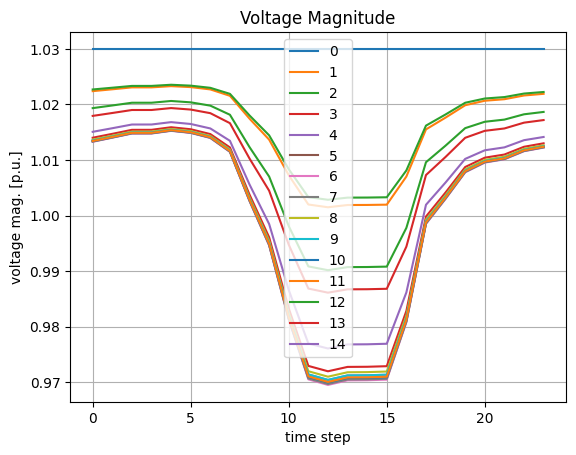

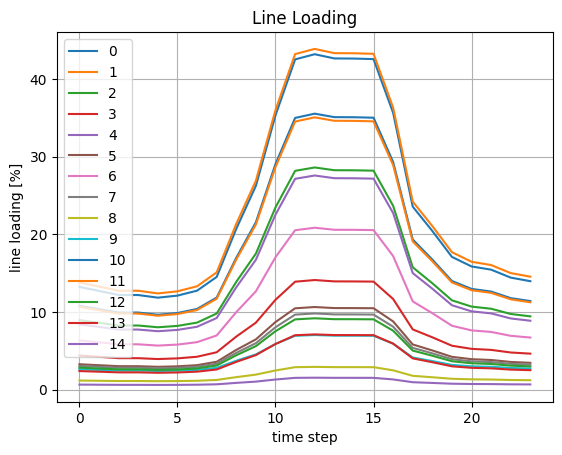

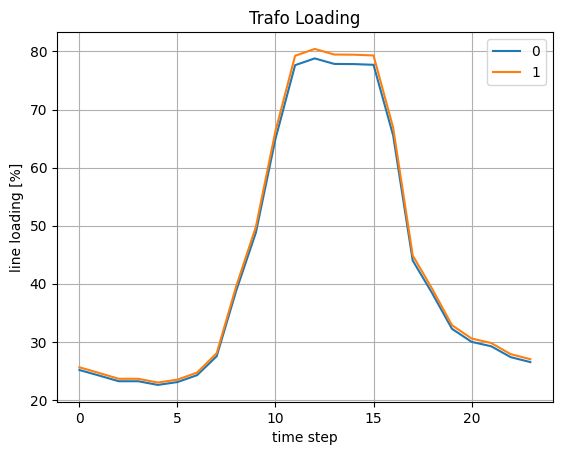

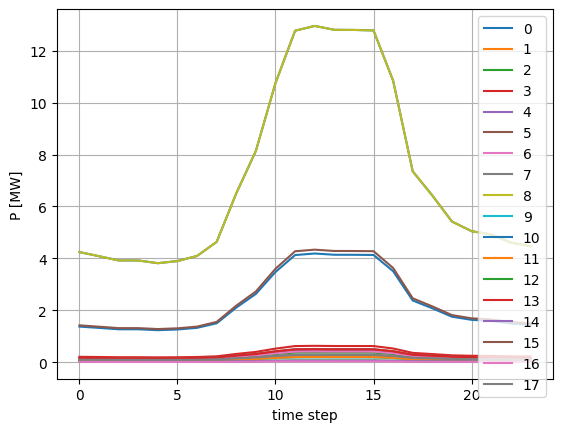

use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since net.line_geodata is empty.
use_bus_geodata is automatically set to True, since 

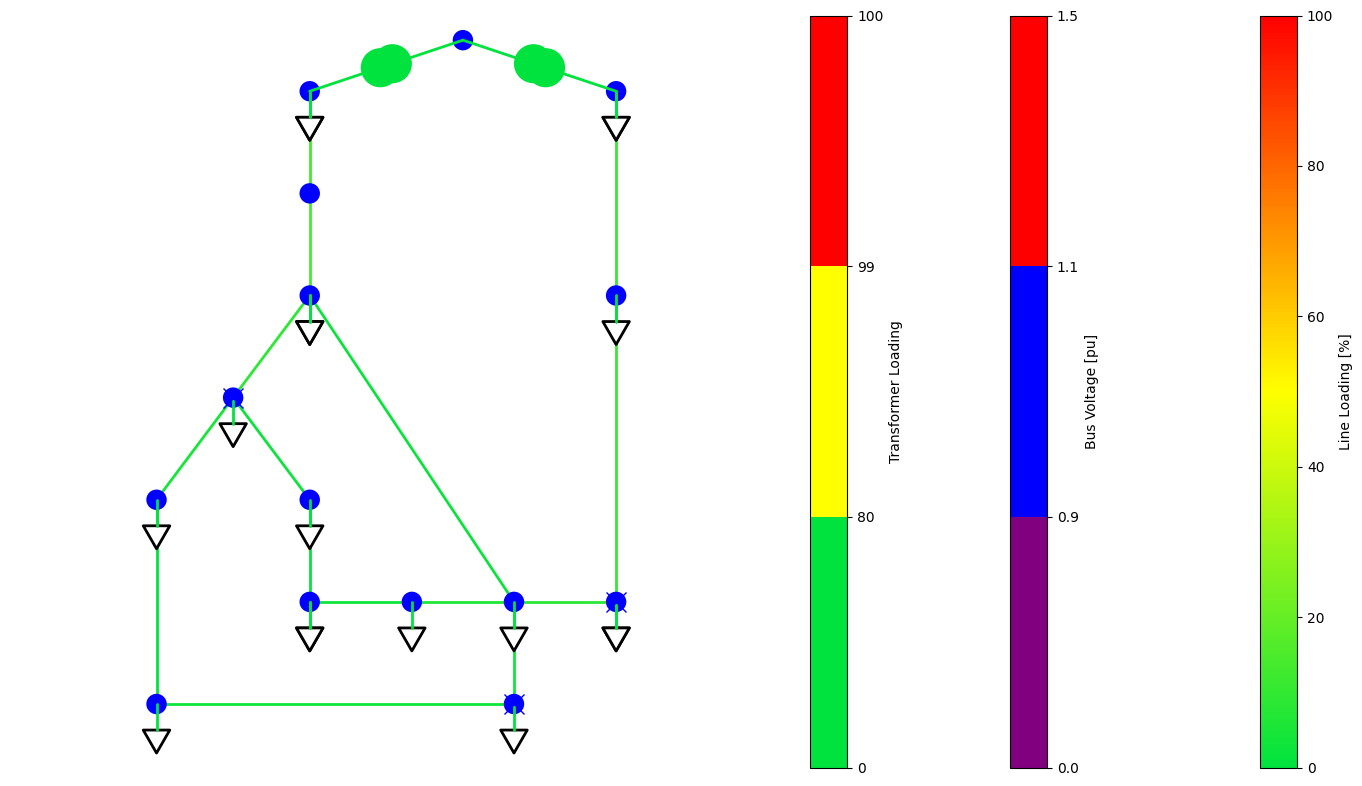

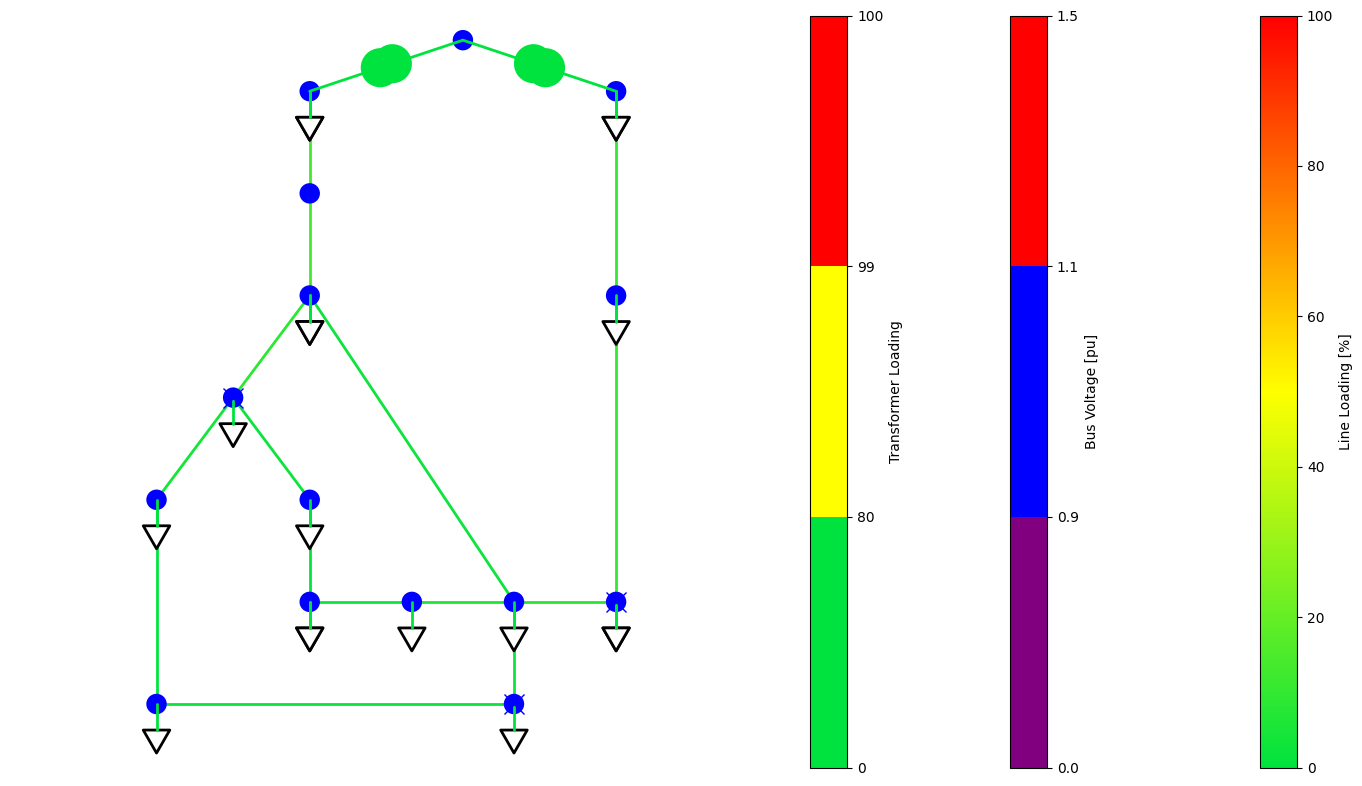

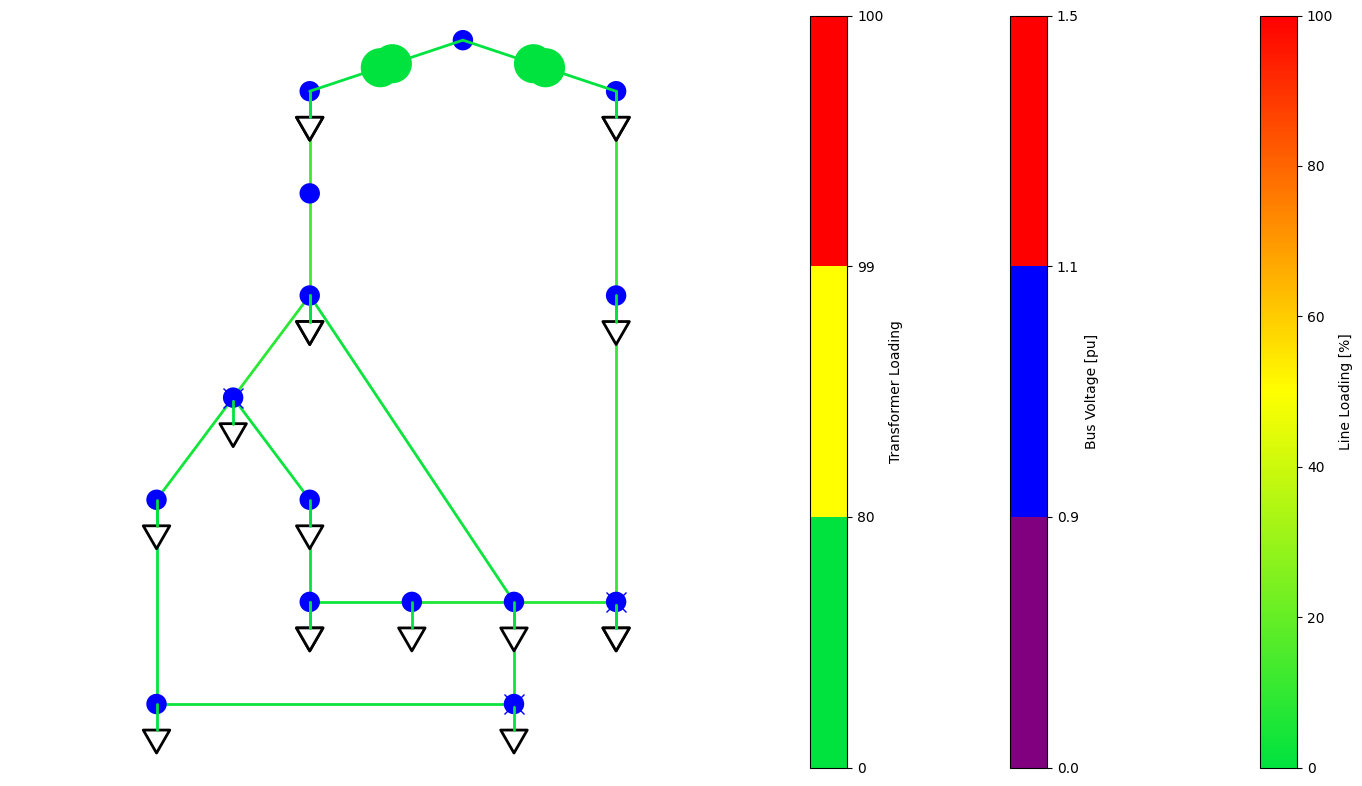

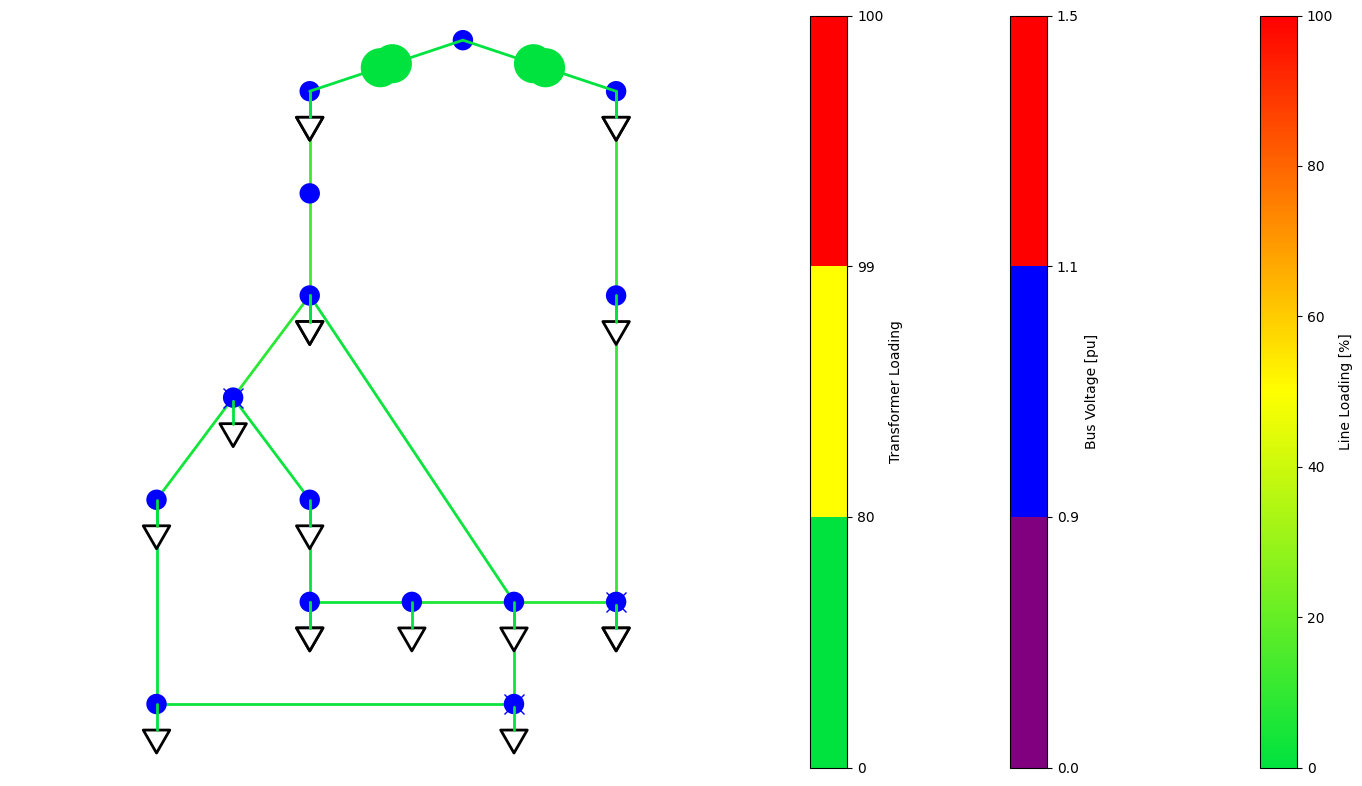

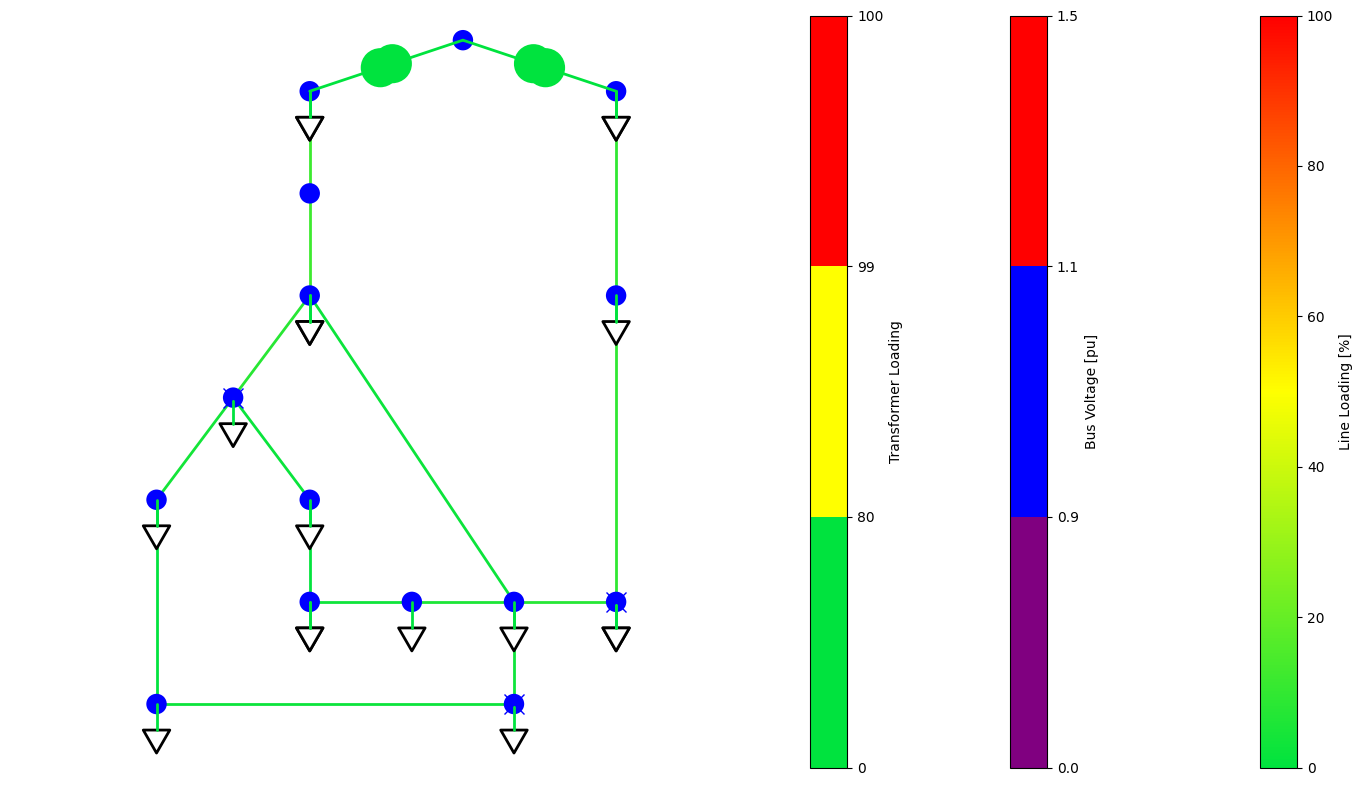

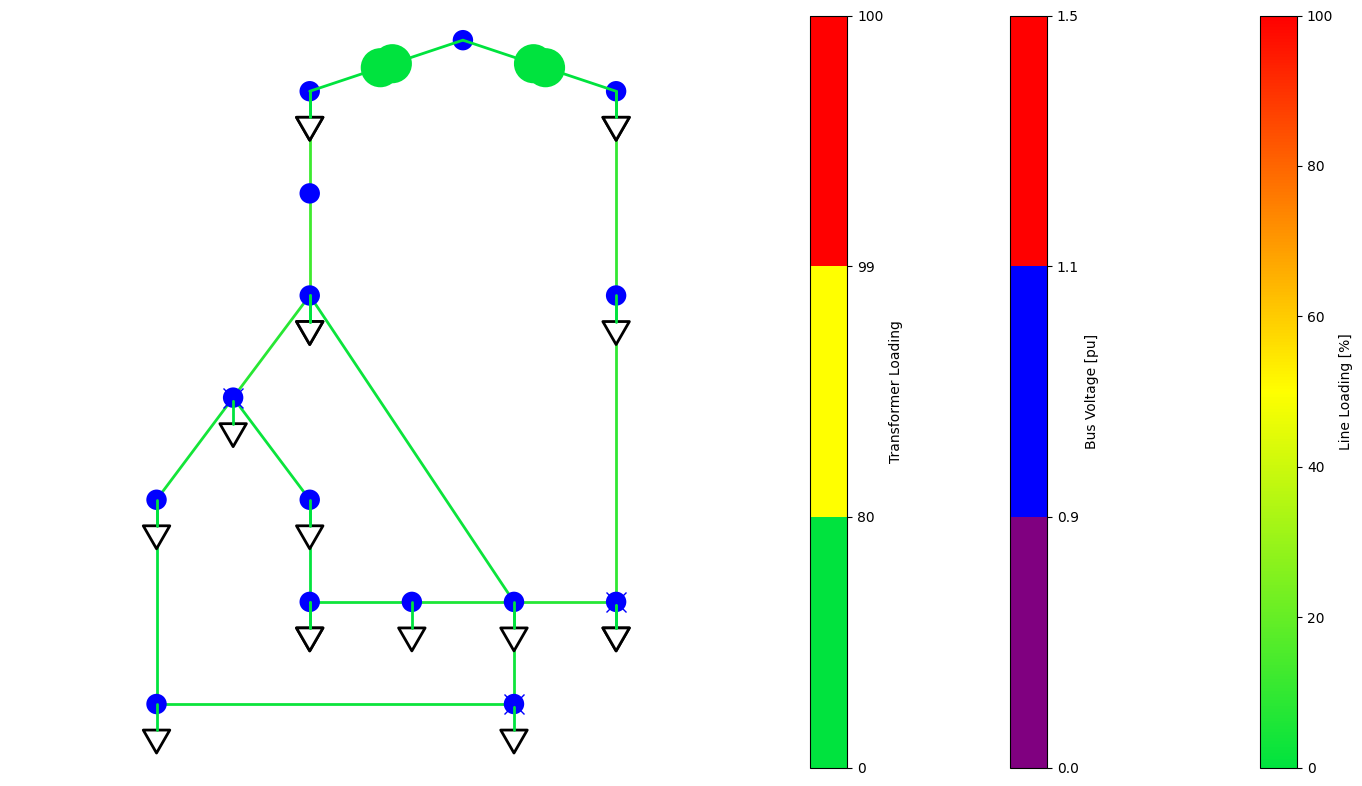

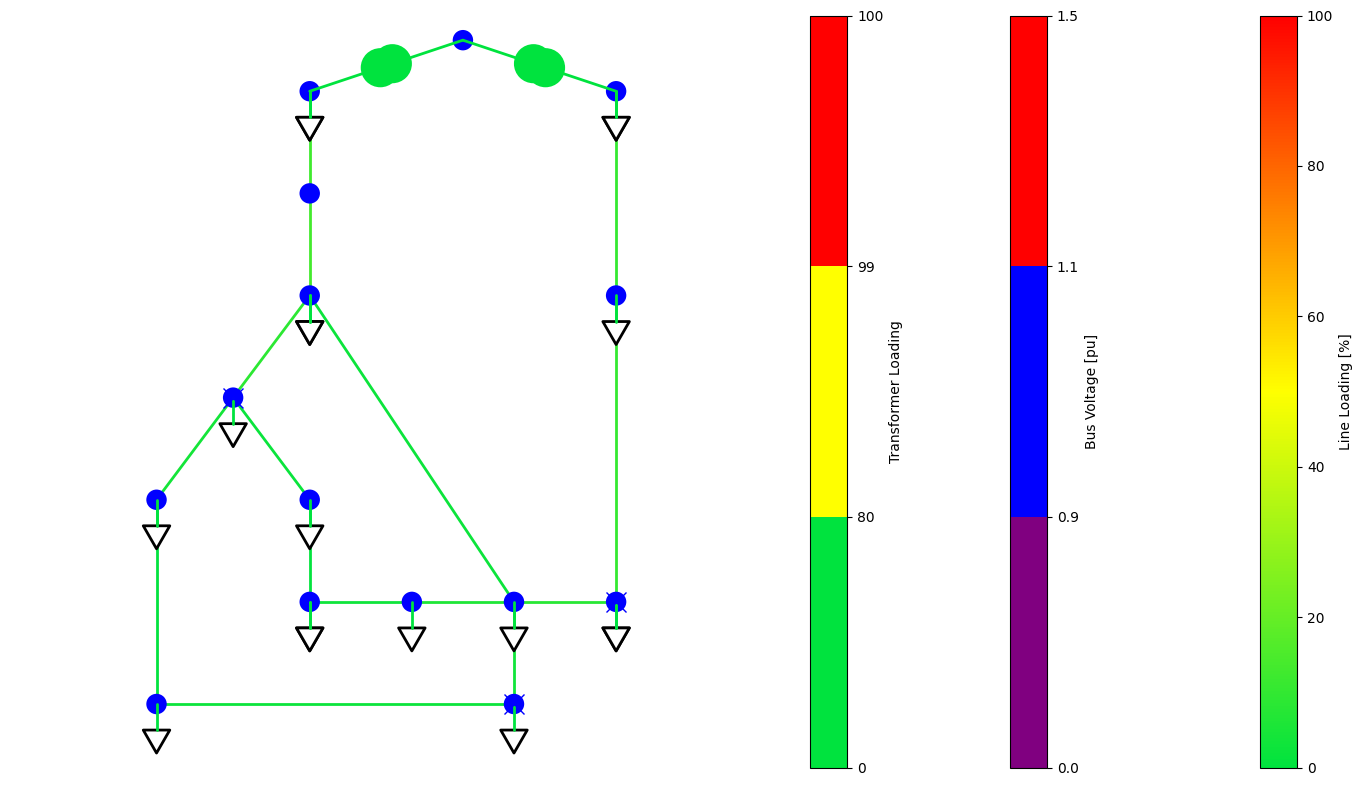

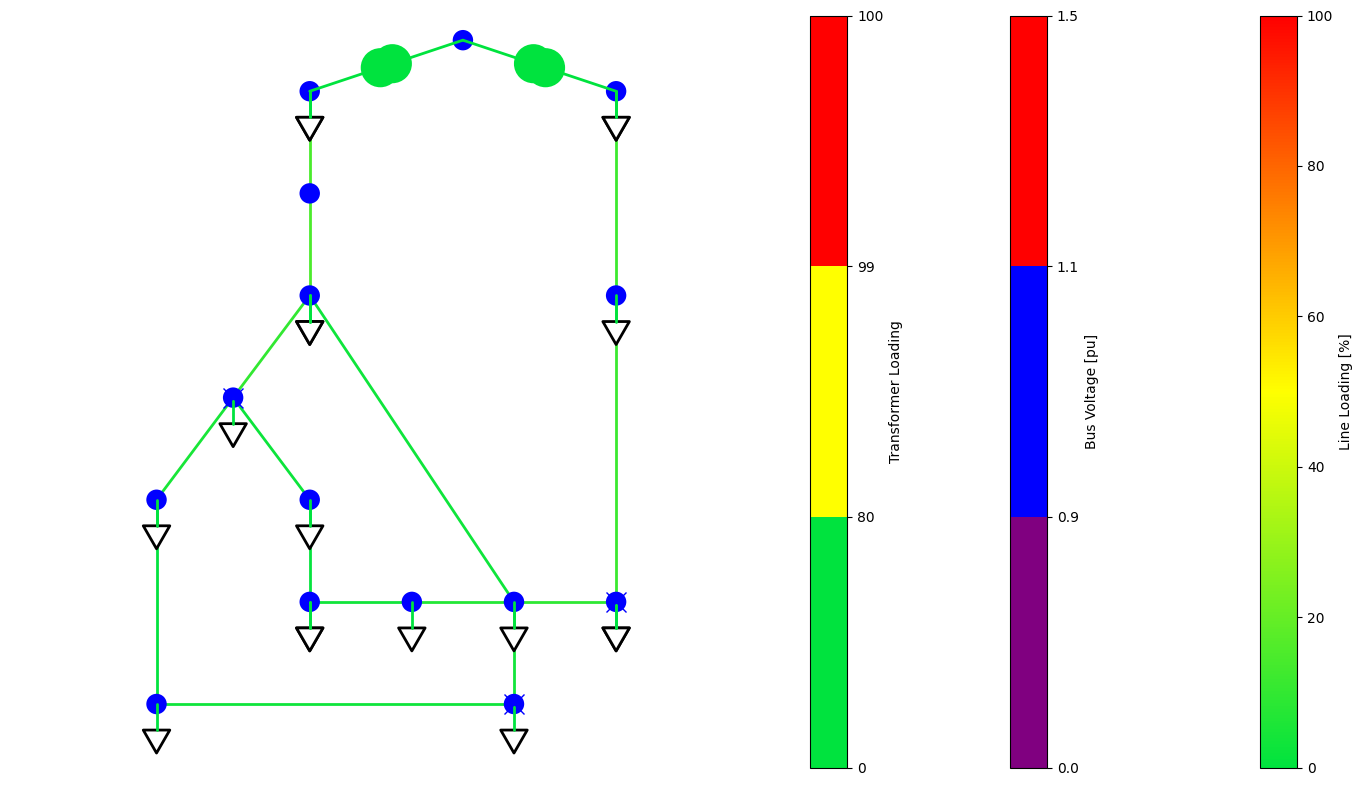

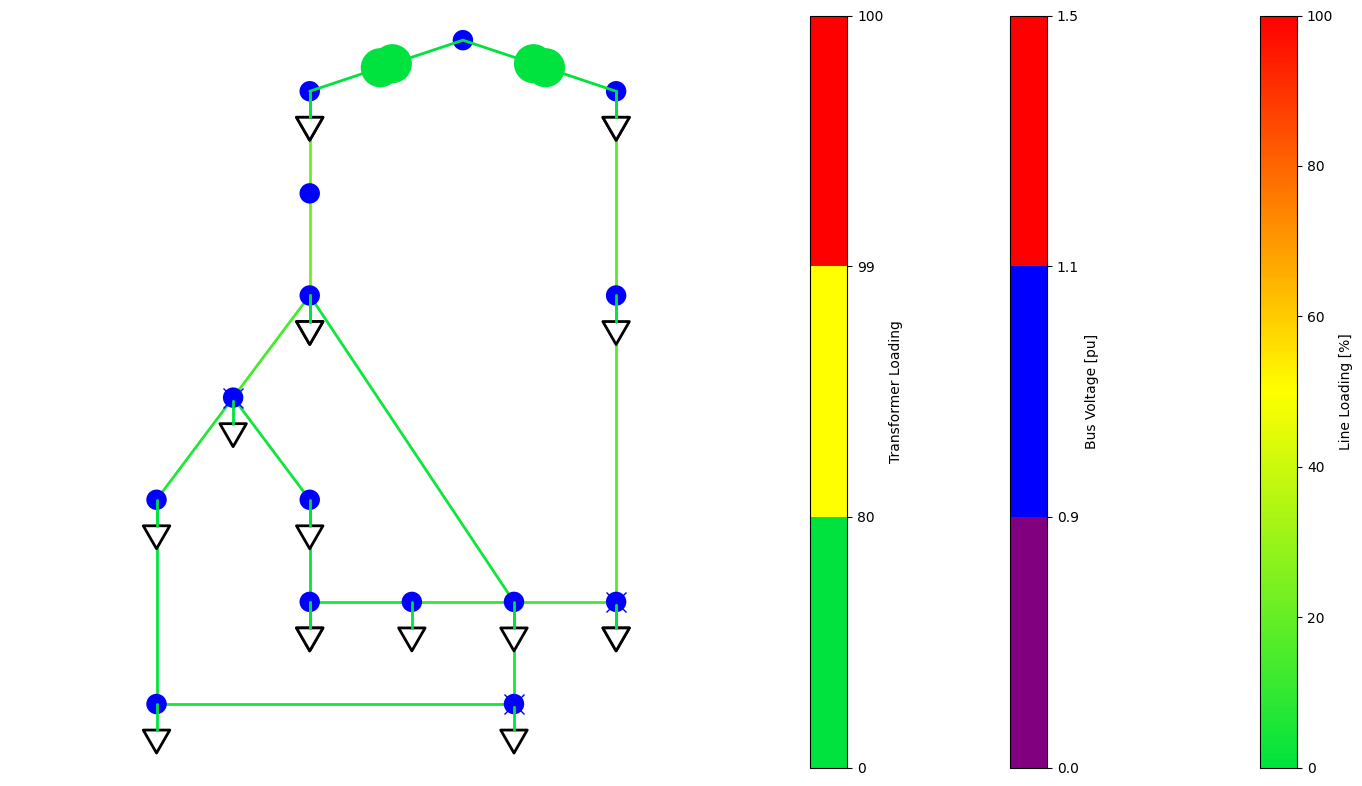

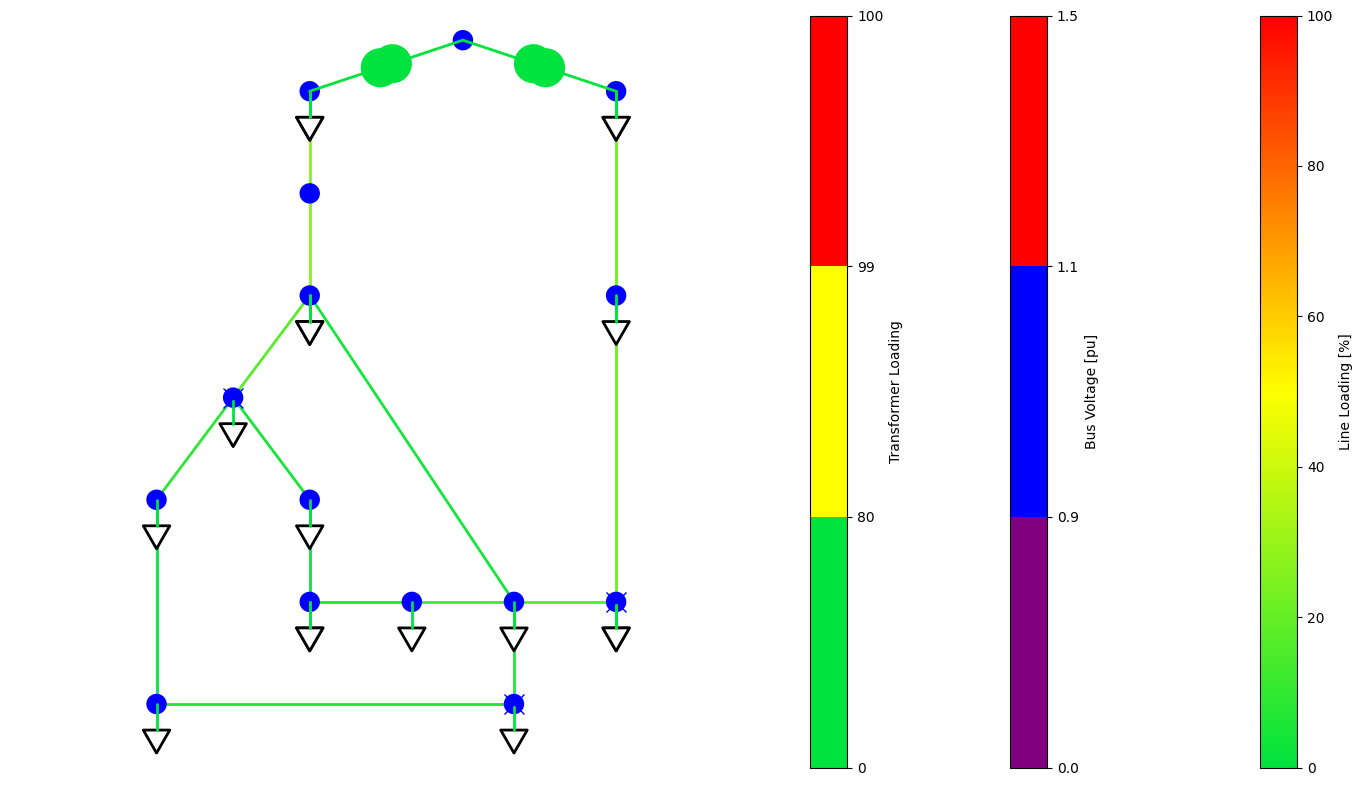

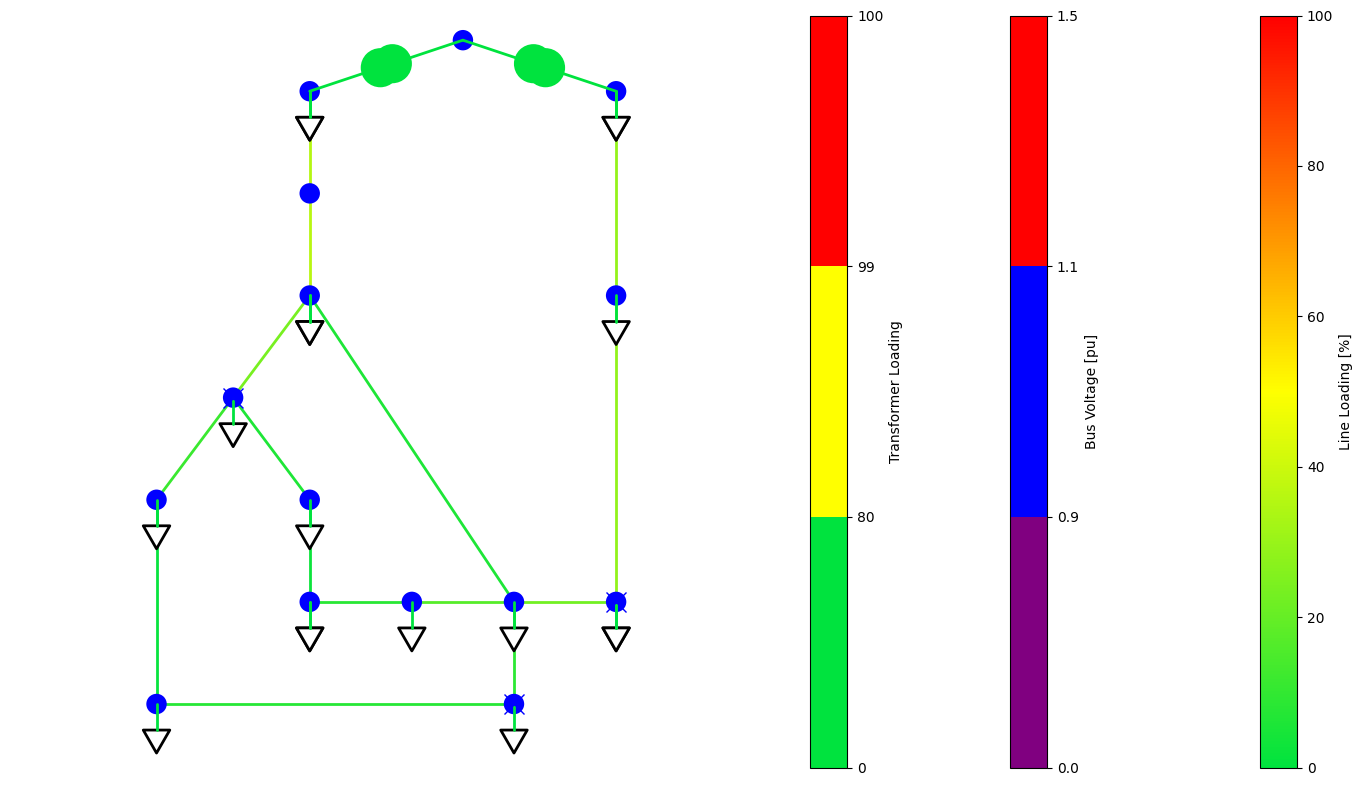

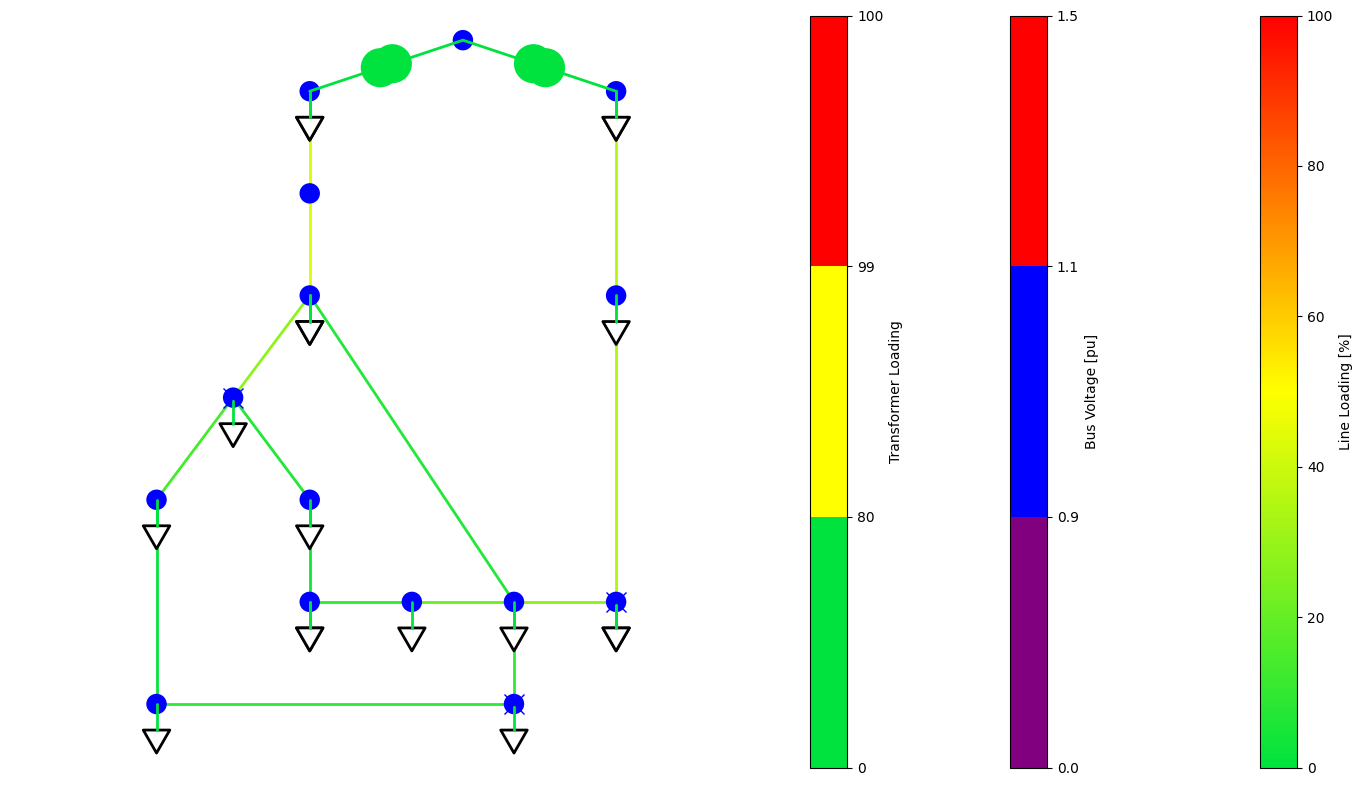

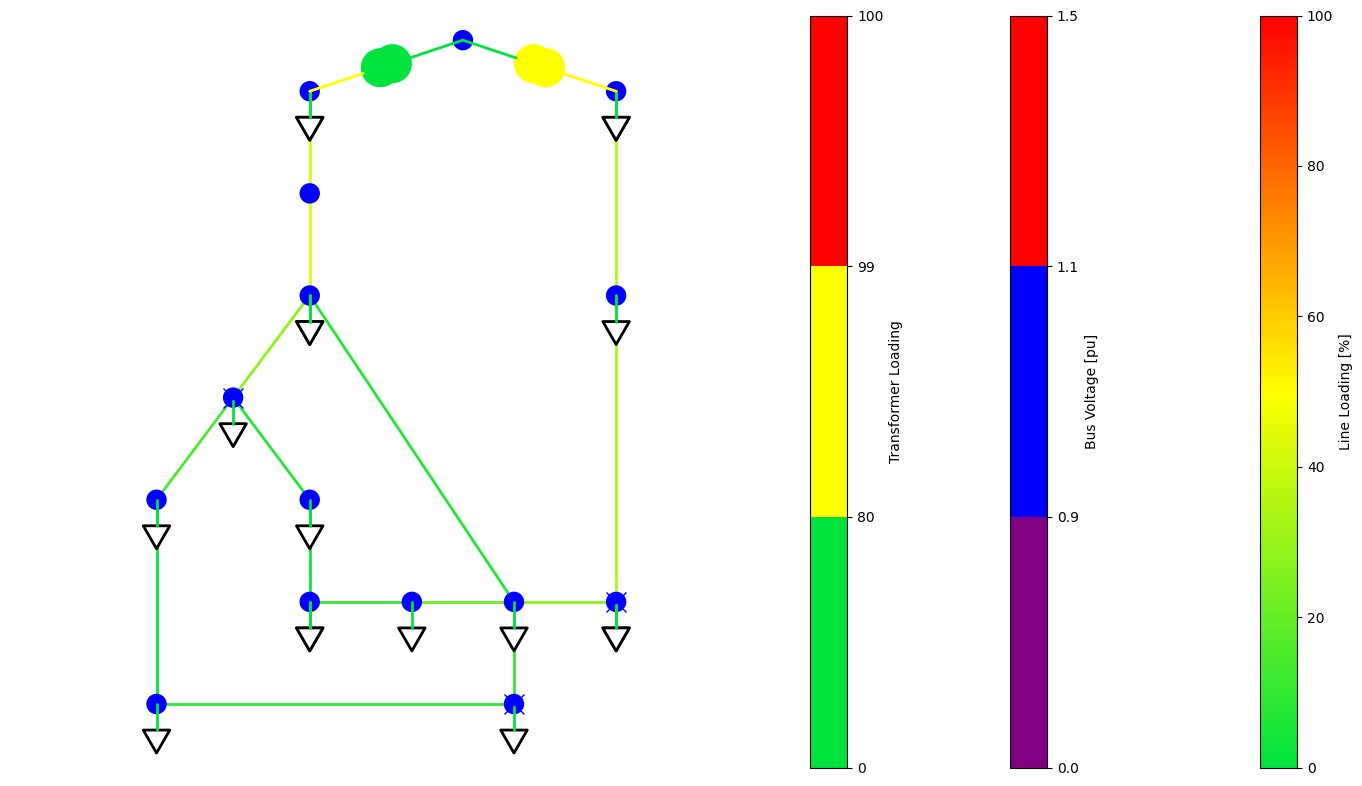

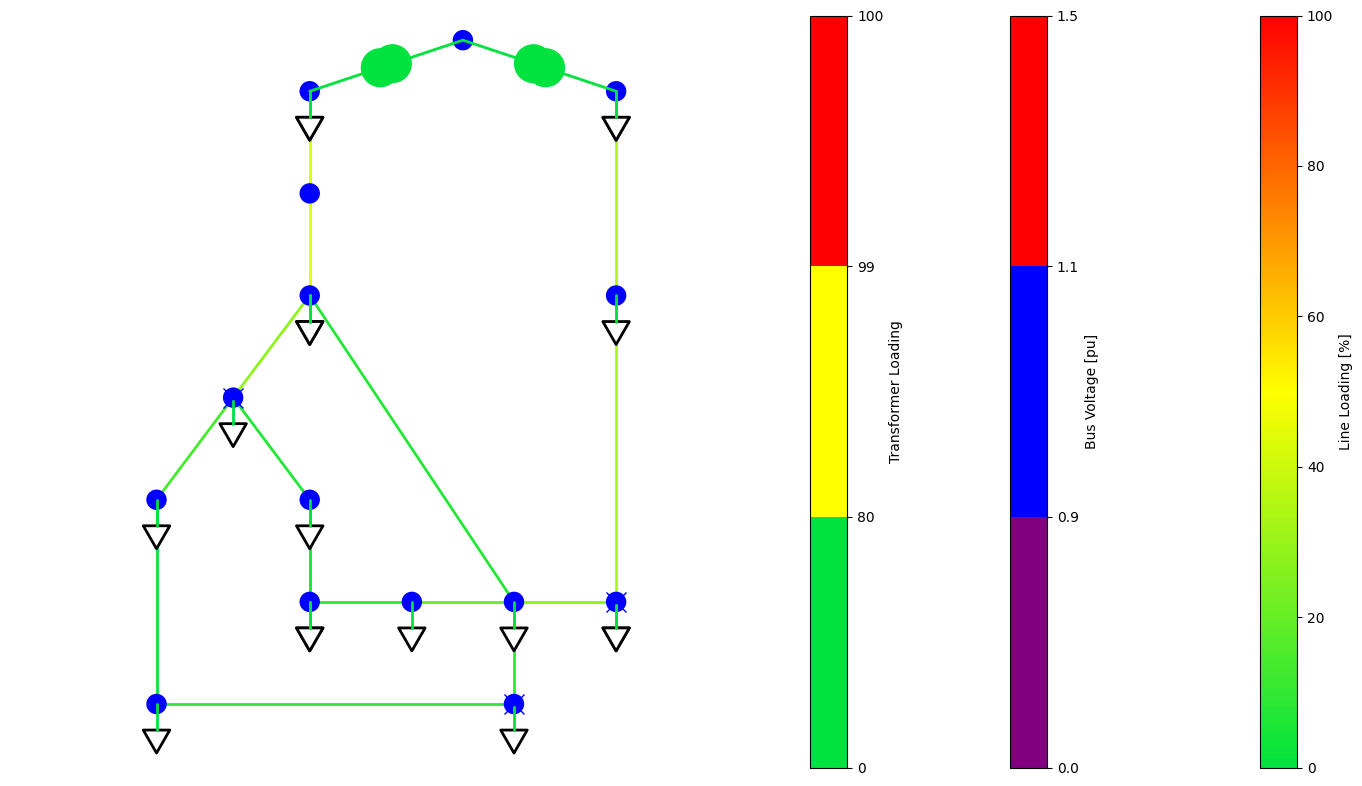

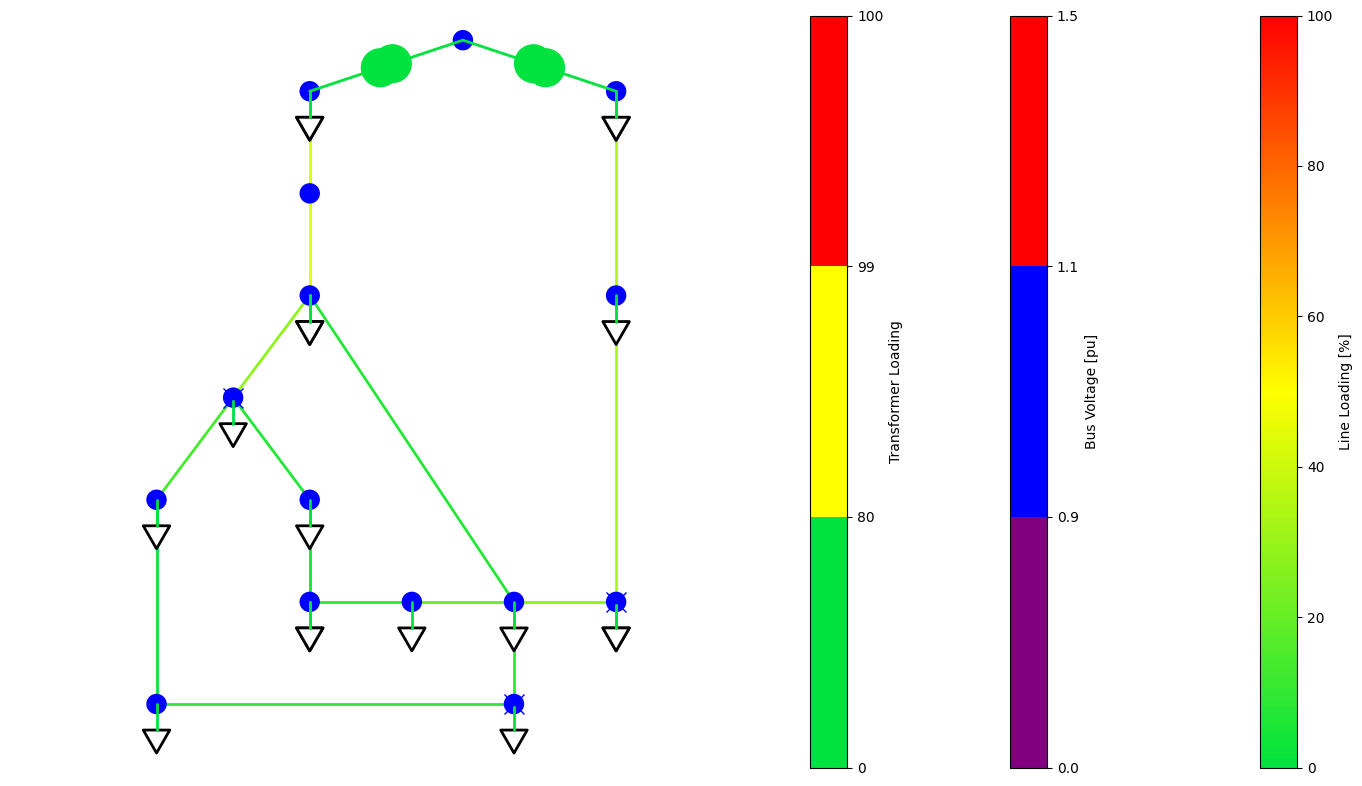

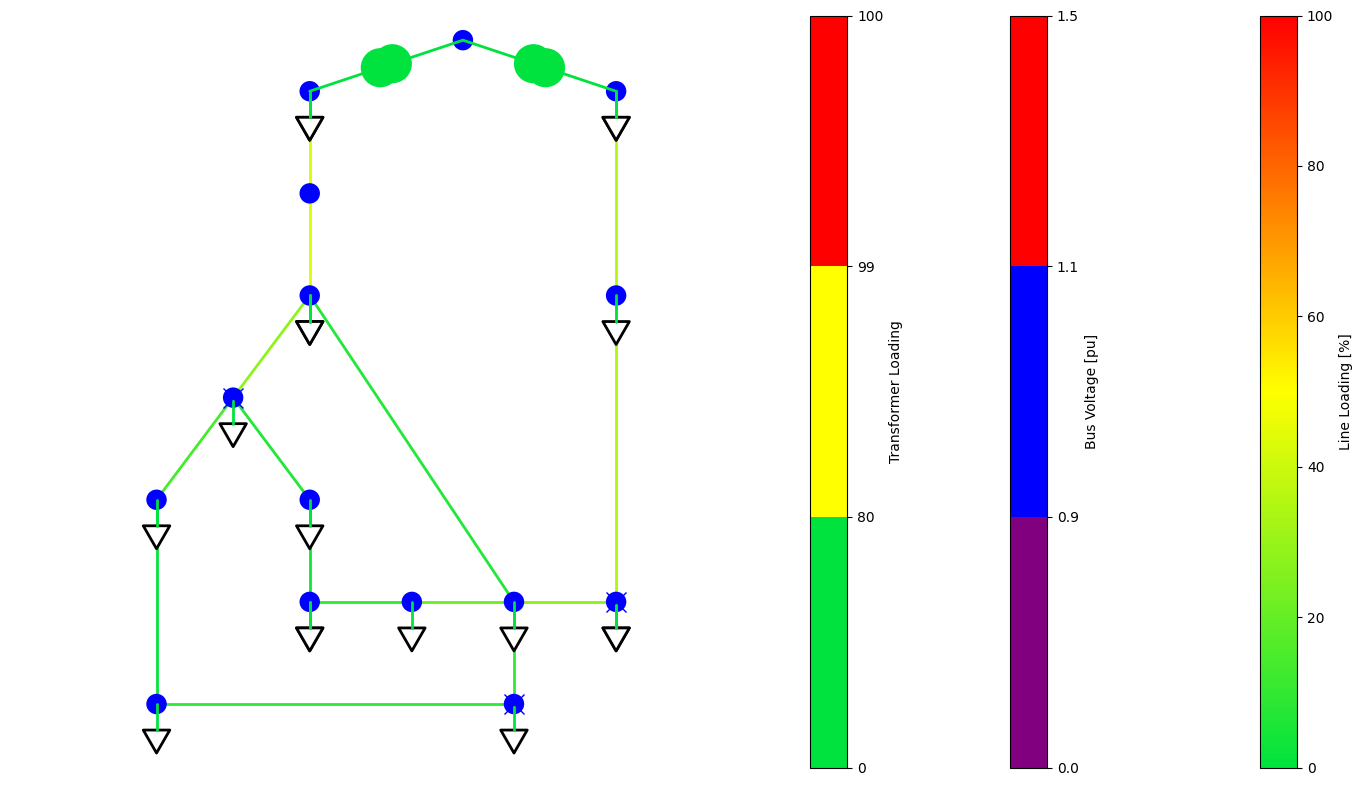

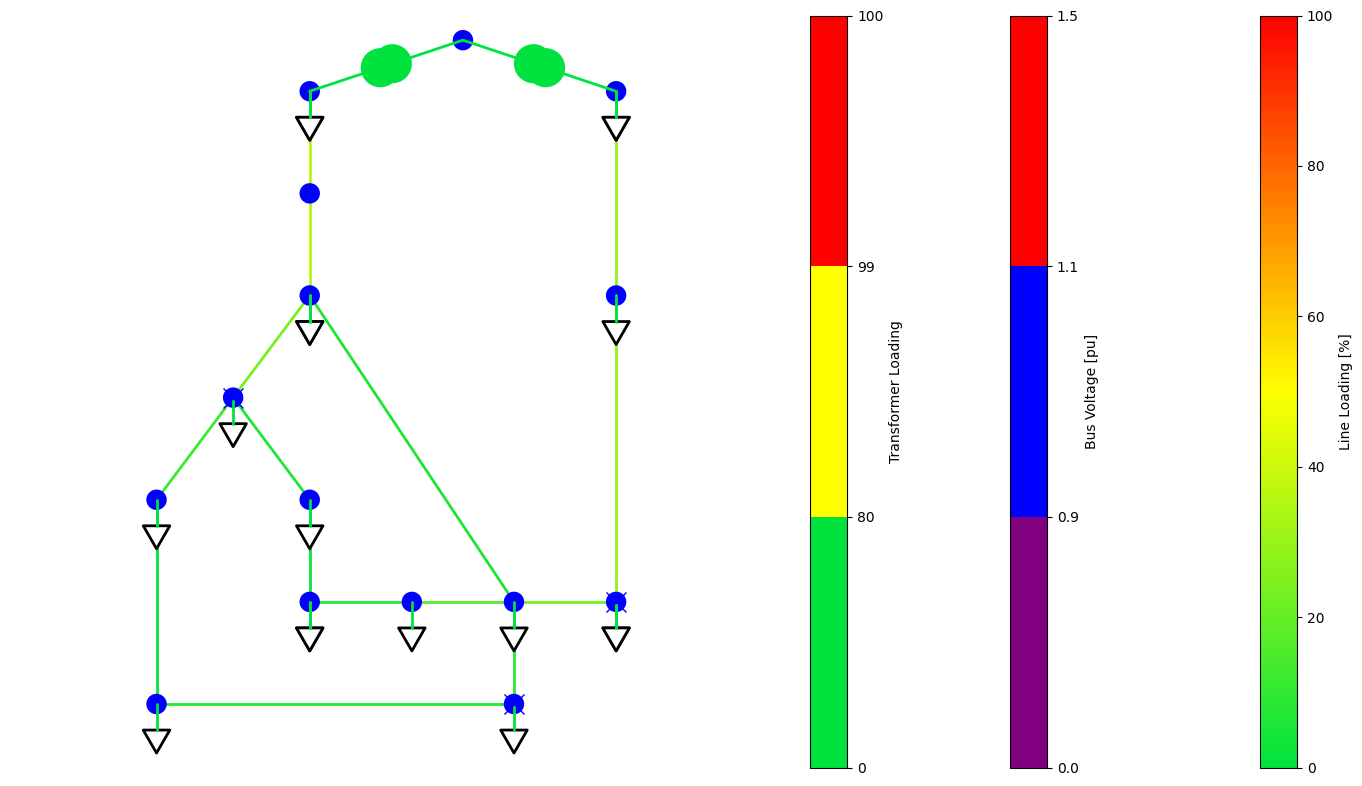

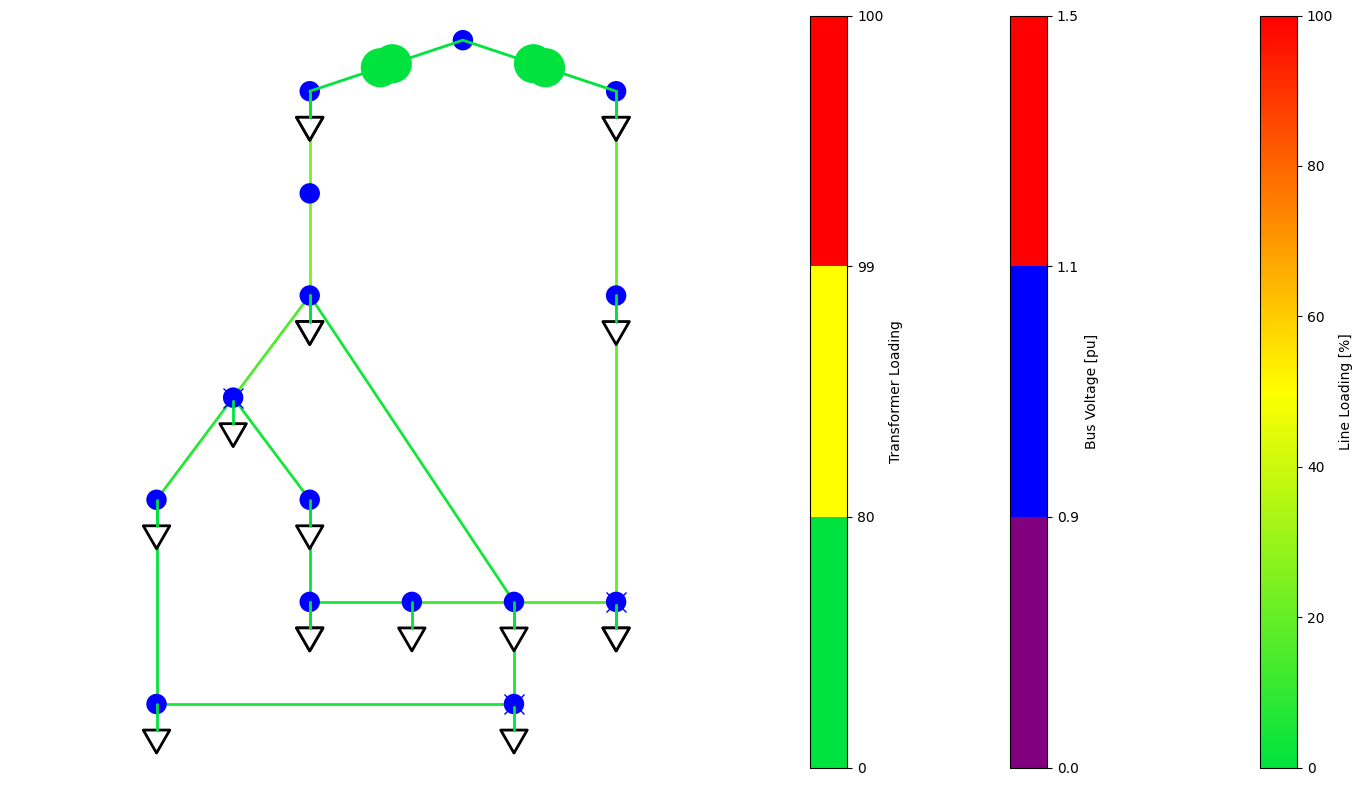

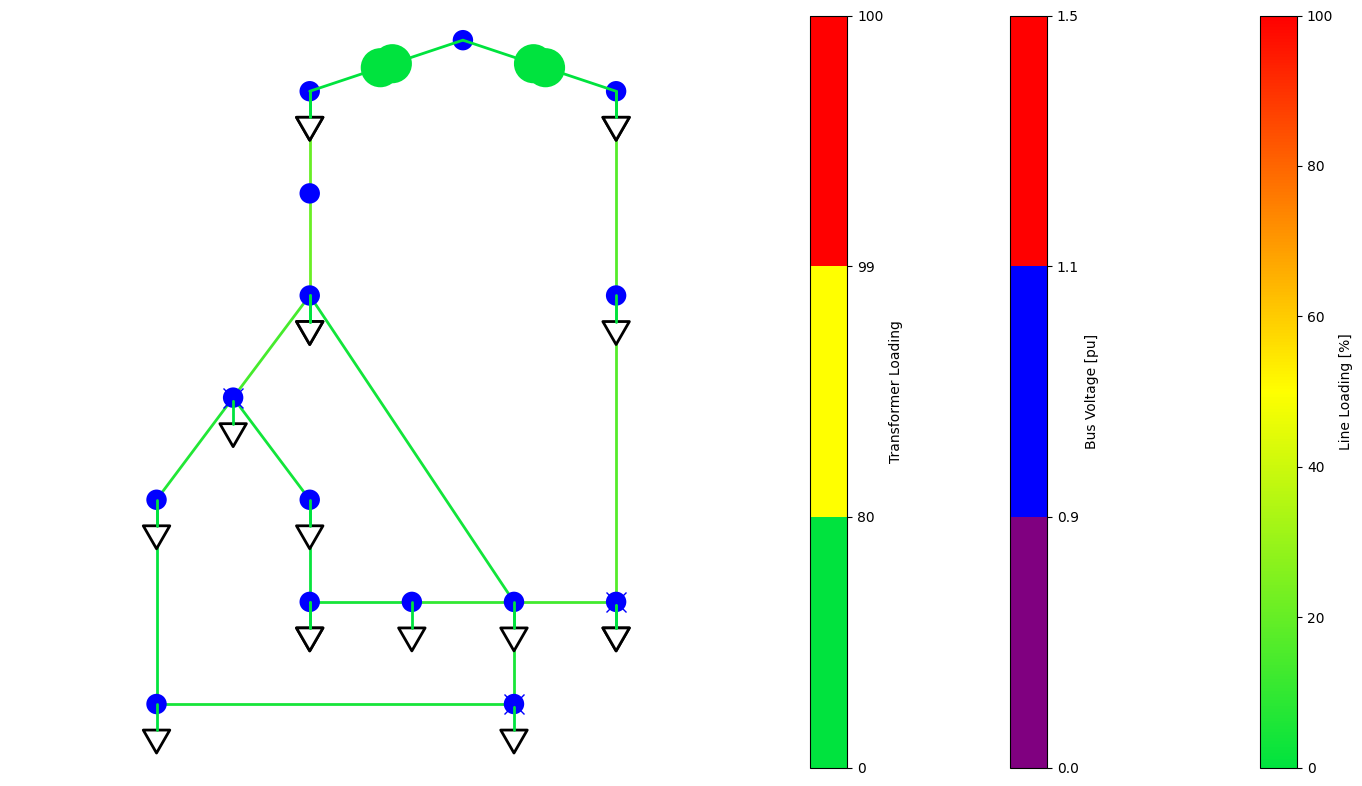

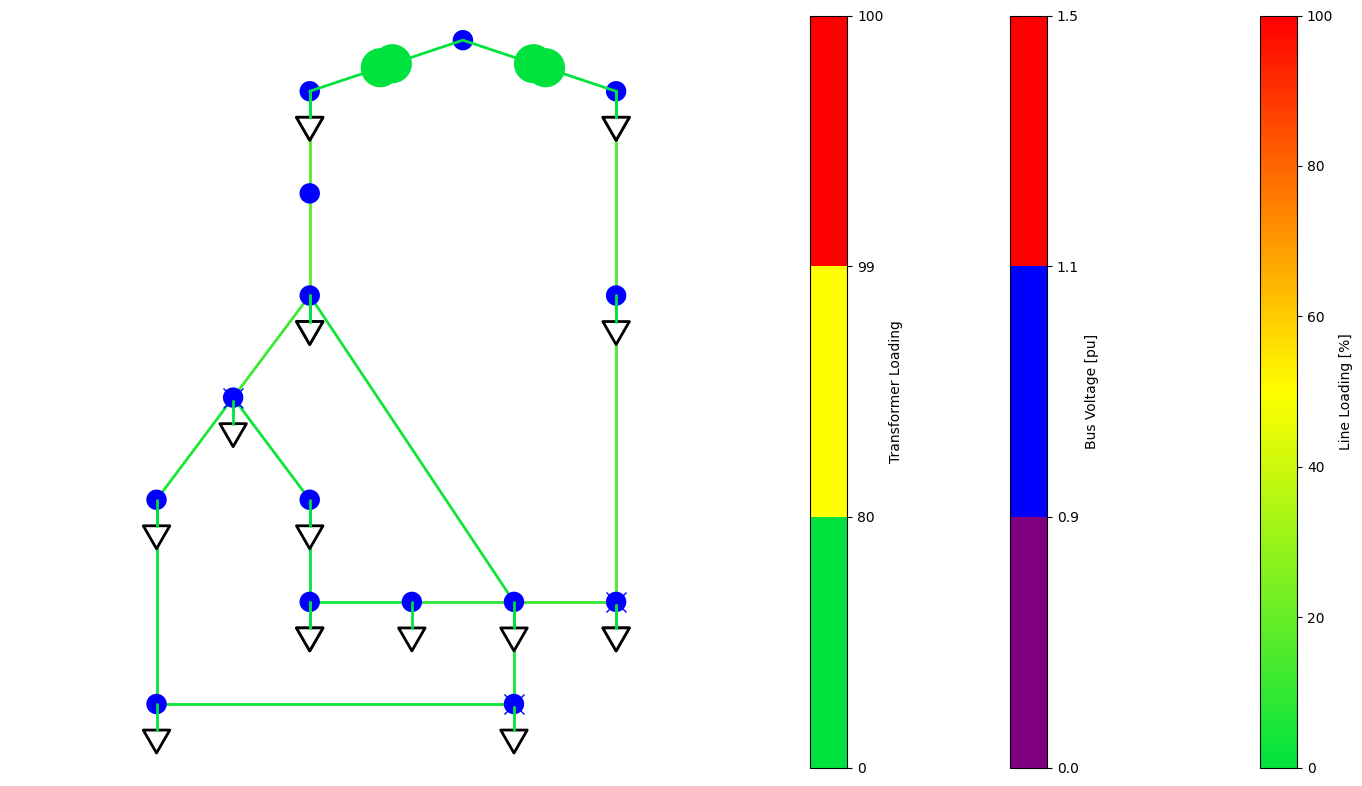

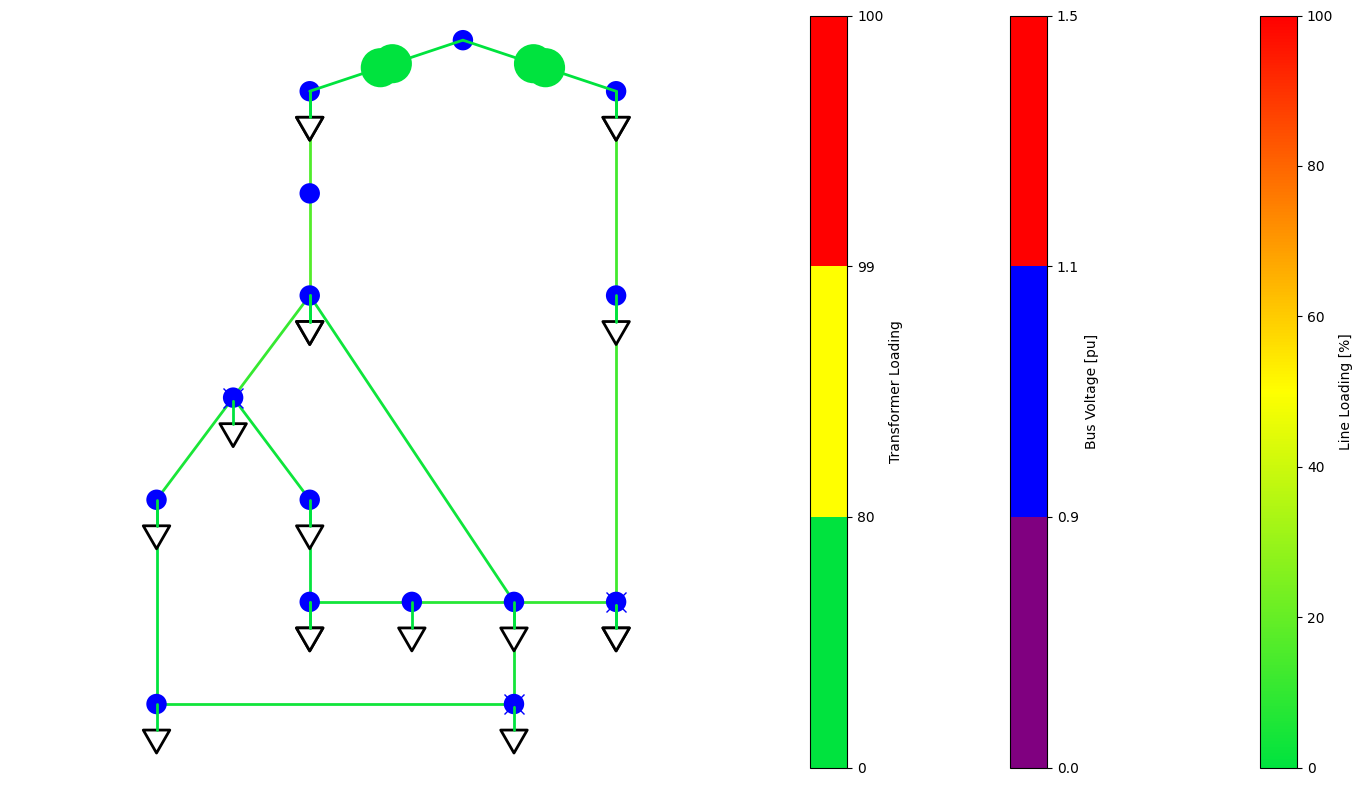

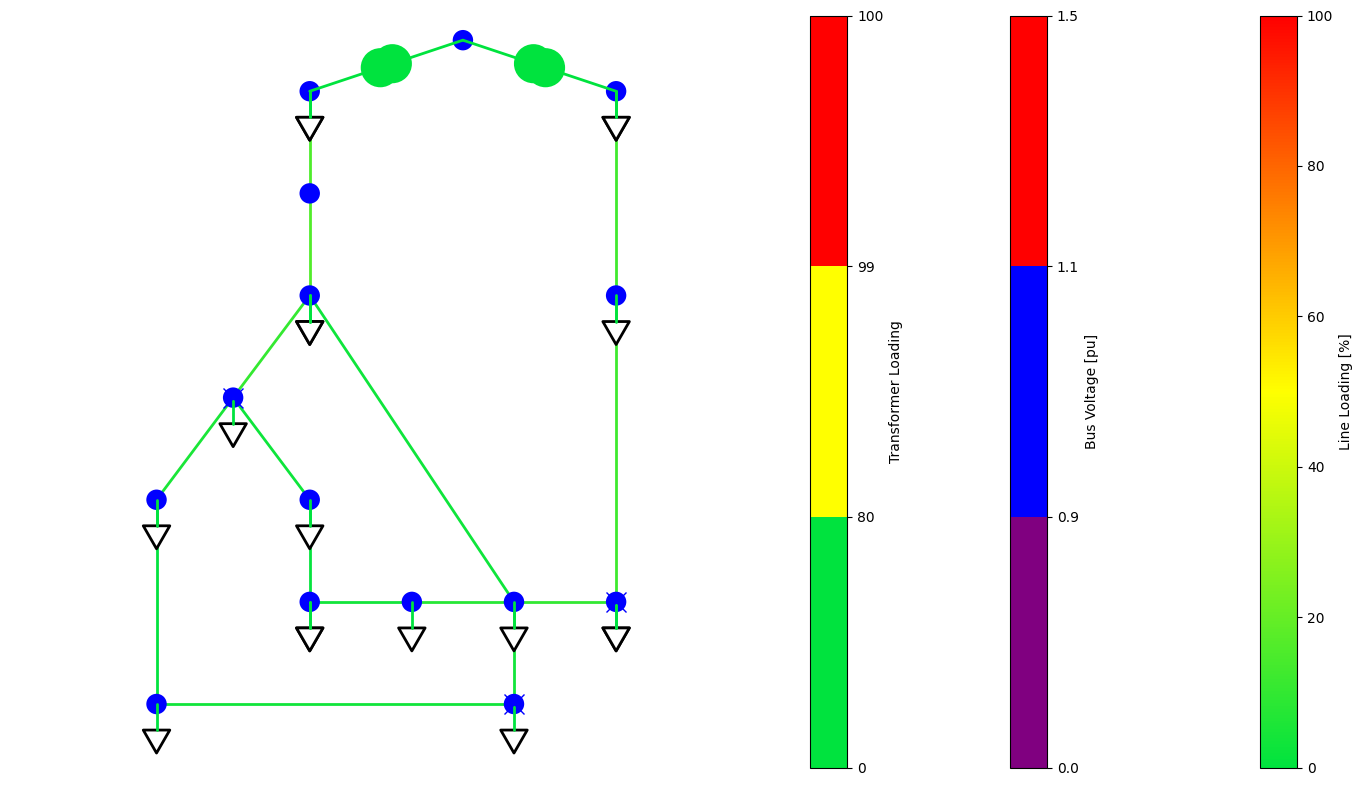

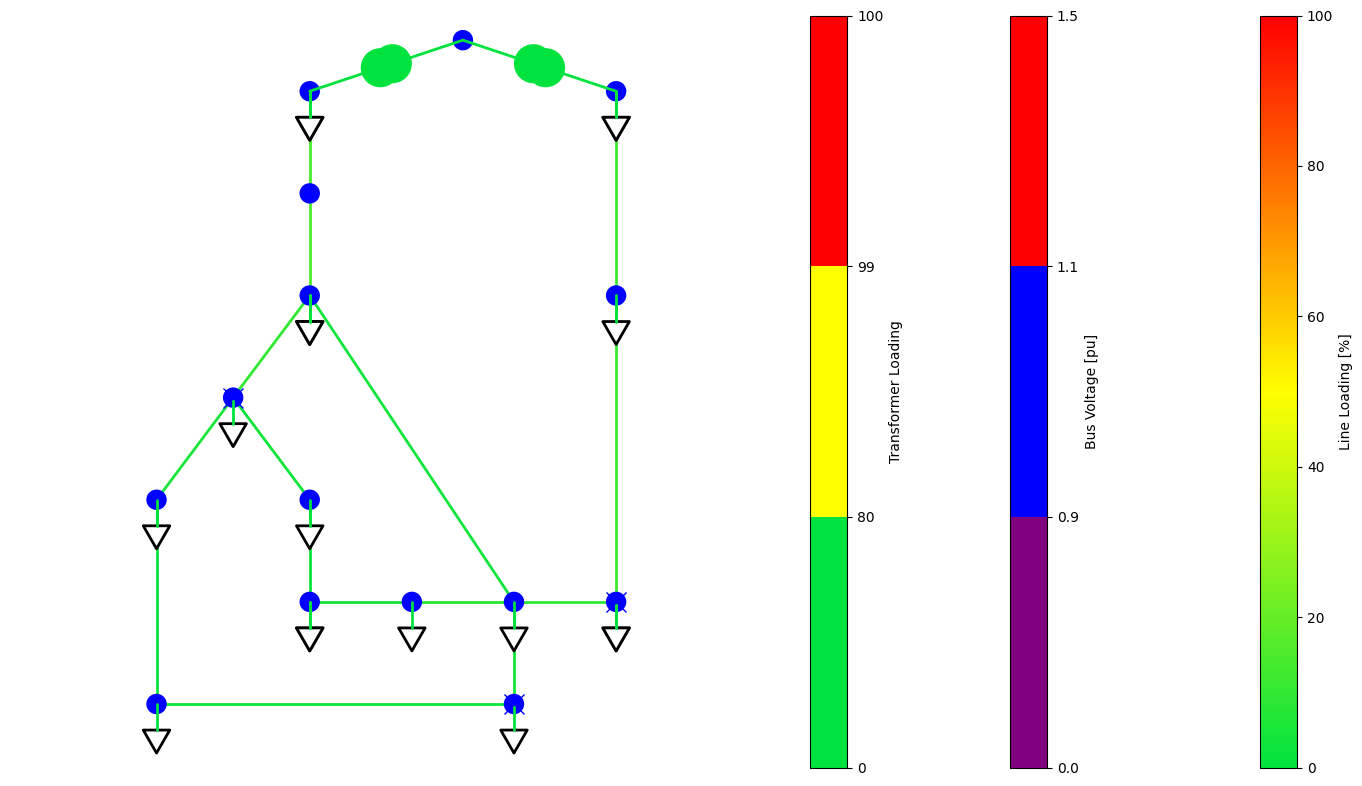

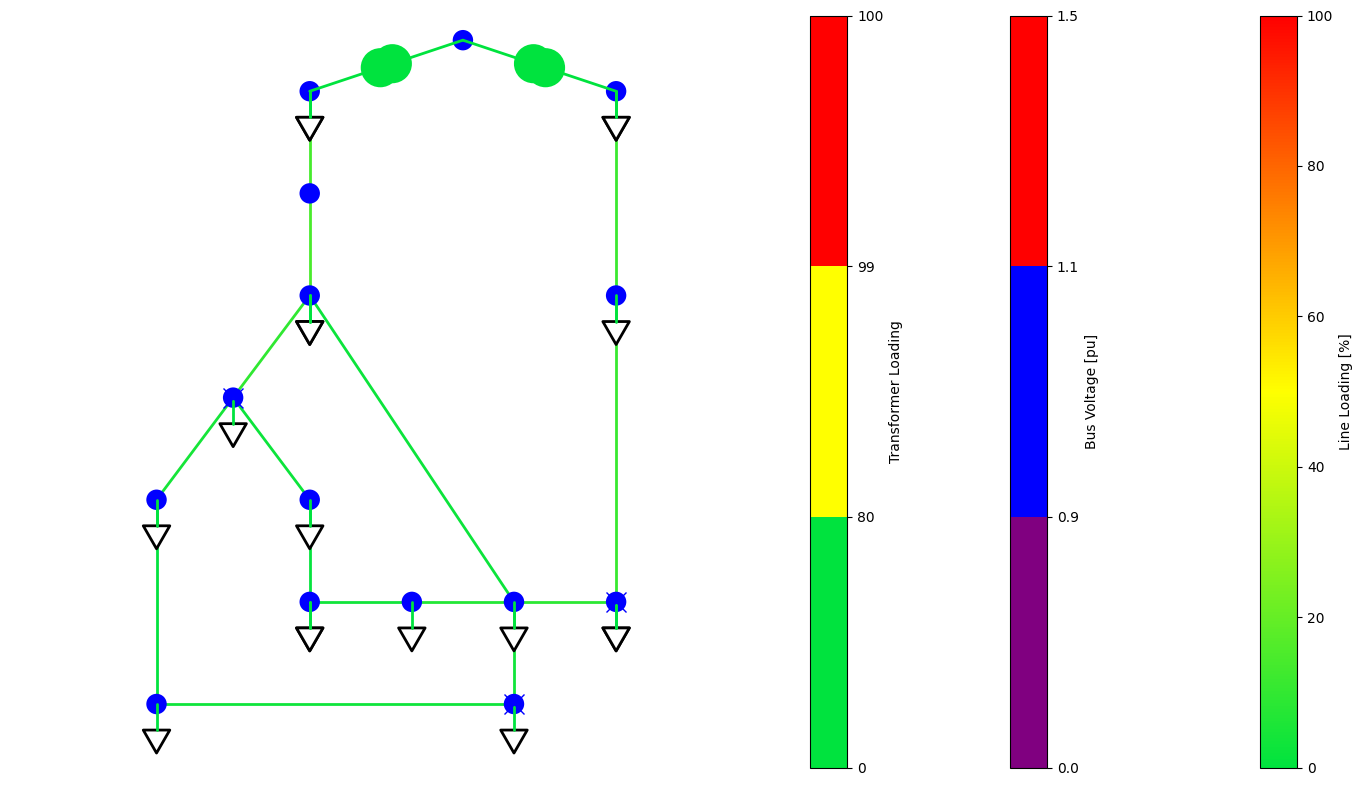

In [148]:

# Get data from excel files

vm_pu_file = os.path.join(output_dir, "res_bus", "vm_pu.xlsx")
vm_pu = pd.read_excel(vm_pu_file, index_col=0)
vm_pu.plot(label="vm_pu")
plt.xlabel("time step")
plt.ylabel("voltage mag. [p.u.]")
plt.title("Voltage Magnitude")
plt.grid()
plt.show()


line_loading_file=os.path.join(output_dir, "res_line", "loading_percent.xlsx")
line_loading=pd.read_excel(line_loading_file, index_col=0)
line_loading.plot(label="line_loading")
plt.xlabel("time step")
plt.ylabel("line loading [%]")
plt.title("Line Loading")
plt.grid()
plt.show()

trafo_loading_file=os.path.join(output_dir, "res_trafo", "loading_percent.xlsx")
trafo_loading=pd.read_excel(trafo_loading_file, index_col=0)
trafo_loading.plot(label="trafo")
plt.xlabel("time step")
plt.ylabel("line loading [%]")
plt.title("Trafo Loading")
plt.grid()
plt.show()

load_p_file=os.path.join(output_dir, "res_load", "p_mw.xlsx")
load_p=pd.read_excel(load_p_file, index_col=0)
load_p.plot(label="load")
plt.xlabel("time step")
plt.ylabel("P [MW]")
plt.grid()
plt.show()

#Plot network
i=0
for hour in loadshape:
    plot_colormaps(line_loading.iloc[i],vm_pu.iloc[i],trafo_loading.iloc[i],load_p.iloc[i],f'{i}.png')
    i+=1